In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from tensorflow.keras.models import save_model, load_model
import numpy as np
import pandas as pd

# **Loading and Preprocessing the data**

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()
width = x_train.shape[1]
height = x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], width, height, 1)
x_test = x_test.reshape(x_test.shape[0], width, height, 1)
input_shape = (width , height, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_train = x_train*2 - 1

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
noise_size = 128

# **Defining the Generator Model architecture**

In [4]:
Generator_Model = Sequential()
Generator_Model.add(Dense(11*11*128,input_shape=[noise_size]))
Generator_Model.add(LeakyReLU(alpha=0.2))
Generator_Model.add(BatchNormalization(momentum=0.8))
Generator_Model.add(Dense(7*7*128))
Generator_Model.add(LeakyReLU(alpha=0.2))
Generator_Model.add(Reshape([7, 7, 128]))
Generator_Model.add(BatchNormalization(momentum=0.8))
Generator_Model.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"))
Generator_Model.add(BatchNormalization())
Generator_Model.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh"))

In [5]:
Generator_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15488)             1997952   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 15488)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15488)             61952     
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              97147008  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         5

# **Defining the Discriminator Model Architecture**

In [6]:
Discriminator_Model = Sequential()
Discriminator_Model.add(Conv2D(64, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.2), input_shape=[width, height, 1]))
Discriminator_Model.add(MaxPooling2D(pool_size=(2, 2)))
Discriminator_Model.add(Dropout(0.1))
Discriminator_Model.add(Conv2D(128, kernel_size=5, strides=2, padding="same", activation=LeakyReLU(0.2)))
Discriminator_Model.add(MaxPooling2D(pool_size=(2, 2)))
Discriminator_Model.add(Dropout(0.1))
Discriminator_Model.add(Flatten())
Discriminator_Model.add(Dense(256, activation="relu"))
Discriminator_Model.add(Dense(1, activation="sigmoid"))

In [7]:
Discriminator_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

# **Defining the GAN architecture**

In [8]:
GAN_Model = Sequential([Generator_Model,Discriminator_Model])

Compiling the models

In [9]:
Discriminator_Model.compile(optimizer='adam',loss='binary_crossentropy')
GAN_Model.compile(optimizer='adam',loss='binary_crossentropy')

# **Training the model**

Discriminator Loss =  0.42277343771971876
Generator Loss =  3.9775753339189284


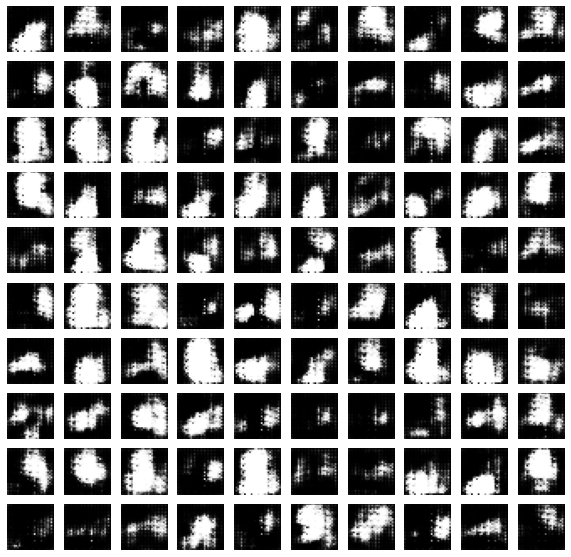

Discriminator Loss =  0.4984360128765305
Generator Loss =  4.391177178621292
Discriminator Loss =  0.5519791605509817
Generator Loss =  3.759072671532631
Discriminator Loss =  0.5380419728470346
Generator Loss =  3.6632043520609536
Discriminator Loss =  0.4835463006029992
Generator Loss =  4.319820456107458
Discriminator Loss =  0.4913925437691311
Generator Loss =  3.537526585261027


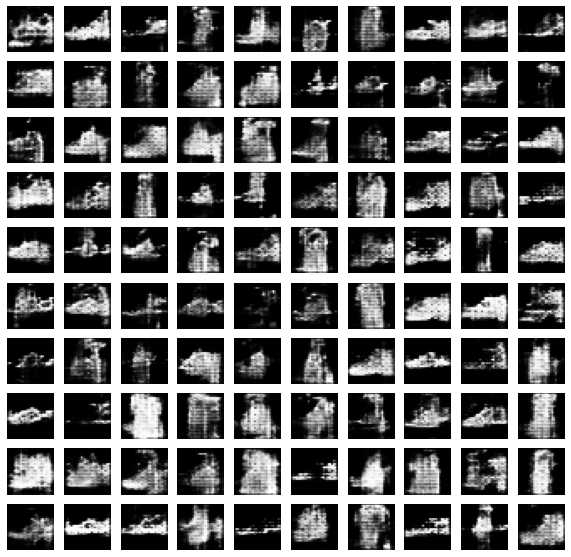

Discriminator Loss =  0.5409585964974637
Generator Loss =  3.751657314300537
Discriminator Loss =  0.5858514659882833
Generator Loss =  3.697788059314092
Discriminator Loss =  0.6681475393970807
Generator Loss =  2.97510489543279
Discriminator Loss =  0.7731909958148996
Generator Loss =  2.4848349209626517
Discriminator Loss =  0.8089809444795052
Generator Loss =  2.4247994196414946


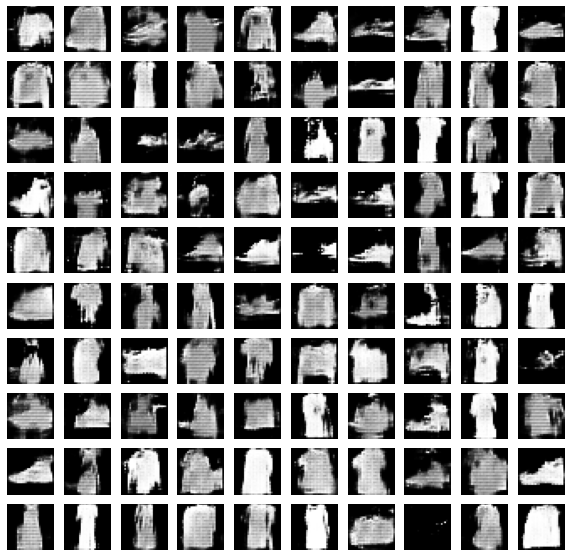

Discriminator Loss =  0.859170760139823
Generator Loss =  2.3393440322081247
Discriminator Loss =  0.8871645716577768
Generator Loss =  2.141803099711736
Discriminator Loss =  0.9283884820838769
Generator Loss =  2.0095772322018943
Discriminator Loss =  0.8445891035348176
Generator Loss =  2.610182308355967
Discriminator Loss =  0.9482077900816996
Generator Loss =  1.9116655441125234


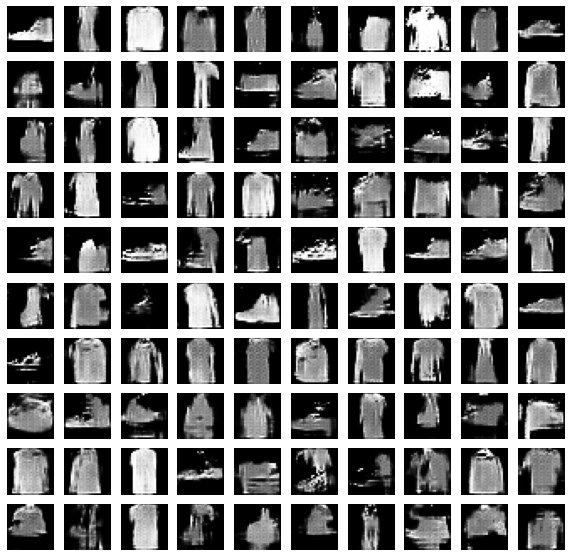

Discriminator Loss =  0.9824761147300403
Generator Loss =  1.692834770878156
Discriminator Loss =  0.9235797489186128
Generator Loss =  2.13517152150472
Discriminator Loss =  1.0032916358609993
Generator Loss =  1.887287517786026
Discriminator Loss =  1.0109003250300885
Generator Loss =  1.6204878135522207
Discriminator Loss =  0.7811852245467404
Generator Loss =  3.9058164141575493


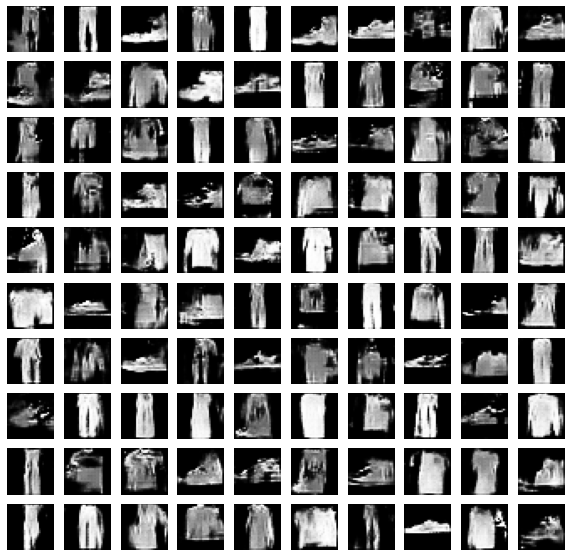

Discriminator Loss =  1.0205209608127674
Generator Loss =  1.7076086103916168
Discriminator Loss =  1.0312928584714731
Generator Loss =  1.5654558449983598
Discriminator Loss =  1.0411274366577465
Generator Loss =  1.6197021822134654
Discriminator Loss =  1.0529559375842412
Generator Loss =  1.558476566473643
Discriminator Loss =  1.0593975026905538
Generator Loss =  1.6387038685878117


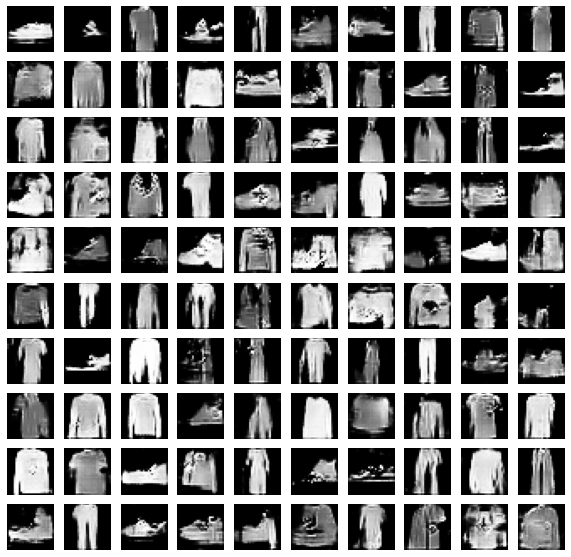

Discriminator Loss =  1.0854094743728637
Generator Loss =  1.4932820894320806
Discriminator Loss =  1.1164280941088995
Generator Loss =  1.5264848349491755
Discriminator Loss =  1.0938589474062126
Generator Loss =  1.4903408485651015
Discriminator Loss =  1.112332706451416
Generator Loss =  1.4352481353282929
Discriminator Loss =  1.1029896274705728
Generator Loss =  1.613499831557274


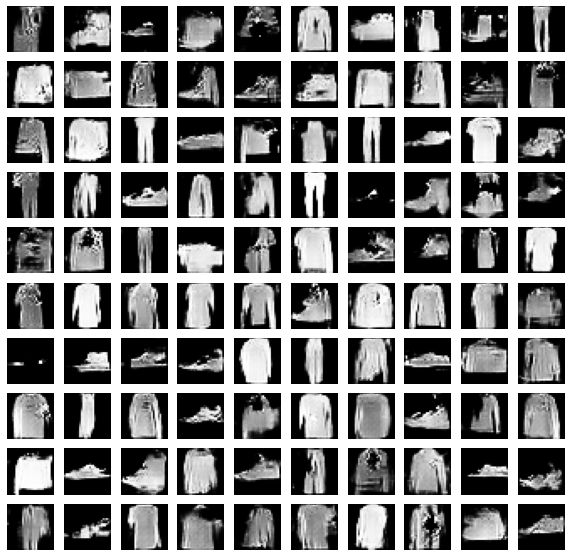

Discriminator Loss =  1.1136931257943312
Generator Loss =  1.3856793310244877
Discriminator Loss =  1.1288465231657028
Generator Loss =  1.4058340564370155
Discriminator Loss =  1.1184685127437115
Generator Loss =  1.4369610232114791
Discriminator Loss =  1.147227049221595
Generator Loss =  1.4146690877278645
Discriminator Loss =  1.1281068583329519
Generator Loss =  1.3809955032666523


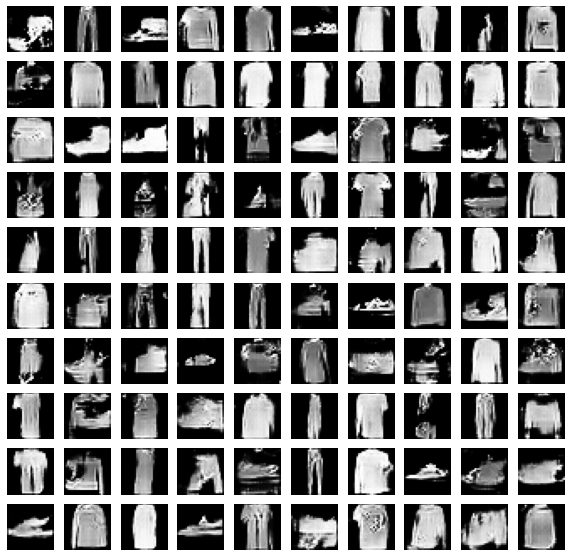

Discriminator Loss =  1.1413814966380595
Generator Loss =  1.4283190060655275
Discriminator Loss =  1.1581528285642464
Generator Loss =  1.3220716892679532
Discriminator Loss =  1.1508324018120766
Generator Loss =  1.3465491356452306
Discriminator Loss =  1.1545671652754148
Generator Loss =  1.37689237733682
Discriminator Loss =  1.1556915382047495
Generator Loss =  1.3088753415147463


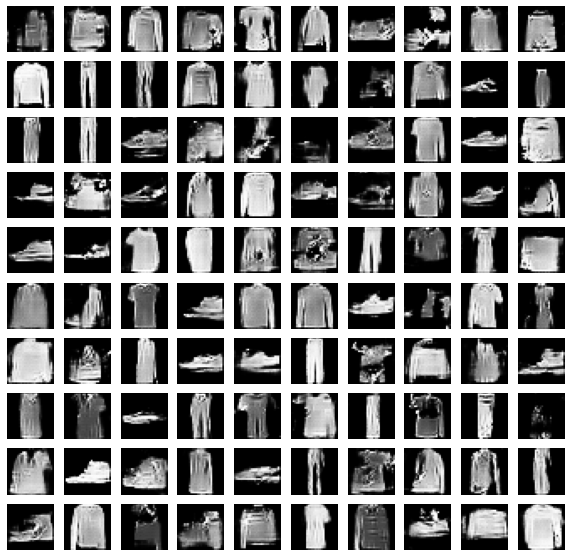

Discriminator Loss =  1.1626549619436264
Generator Loss =  1.3379984059929848
Discriminator Loss =  1.1585440283020338
Generator Loss =  1.3501206243038177
Discriminator Loss =  1.1516716760396957
Generator Loss =  1.4379023123780887
Discriminator Loss =  1.1811670088768005
Generator Loss =  1.2207884306708972
Discriminator Loss =  1.1691869057218234
Generator Loss =  1.288301353851954


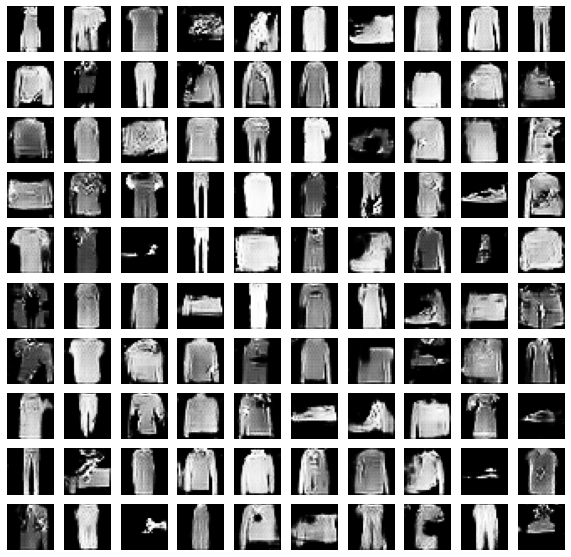

Discriminator Loss =  1.1733130597074826
Generator Loss =  1.3786659848690033
Discriminator Loss =  1.1786192134519418
Generator Loss =  1.2427751237154008
Discriminator Loss =  1.1321819797654946
Generator Loss =  1.5931778026620547
Discriminator Loss =  1.1817284796138605
Generator Loss =  1.2071976053714752


In [ ]:
batch_size = 600
epochs = 100
total_batch = int(x_train.shape[0] / batch_size)
loss_disc = []
loss_gen = []

for i in range(epochs):
  for j in range(total_batch):

    noise = np.random.normal(size=[batch_size,noise_size])
    output_gen = Generator_Model.predict(noise)
    batch_data = x_train[j * batch_size : (j+1) * batch_size]
    train_data = np.concatenate((batch_data , output_gen) , axis = 0)
    real_label=np.ones(shape=(batch_size,1))
    fake_label=np.zeros(shape=(batch_size,1))
    target = np.concatenate((real_label , fake_label) , axis = 0)

    discriminator_history = Discriminator_Model.fit(train_data, target, batch_size = batch_size * 2, epochs = 1 , verbose = 0)

    noise = np.random.normal(size=[batch_size,noise_size])

    Discriminator_Model.trainable = False

    GAN_history = GAN_Model.fit(noise, fake_label, batch_size = batch_size, epochs = 1, verbose = 0)

    Discriminator_Model.trainable = True

  print("Discriminator Loss = " , discriminator_history.history['loss'])
  print("Generator Loss = " , GAN_history.history['loss'])
  loss_disc.append(discriminator_history.history['loss'])
  loss_gen.append(GAN_history.history['loss'])

  if i % (epochs / 10) == 0:
    samples = 100
    fake_data = Generator_Model.predict(np.random.normal(loc=0, scale=1, size=(samples, noise_size)))

    for k in range(samples):
        plt.subplot(10, 10,k+1)
        plt.imshow(fake_data[k].reshape(28, 28), cmap='gray')
        plt.axis("off")

    plt.show()



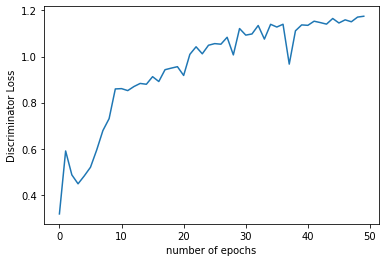

In [19]:
indices = range(epochs)
plt.plot(indices, loss_disc)
plt.xlabel('number of epochs')
plt.ylabel('Discriminator Loss')
plt.show()

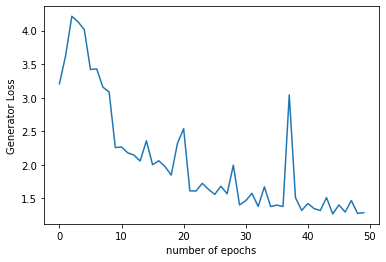

In [20]:
plt.plot(indices, loss_gen)
plt.xlabel('number of epochs')
plt.ylabel('Generator Loss')
plt.show()

Reference - https://www.kaggle.com/sayakdasgupta/introduction-to-gans-on-fashion-mnist-dataset